## <center><strong>Metode Numerik</strong><br />
<img alt="" src="images/MetNum.png" style="height: 200px;" /></center>

# <center><font color="blue">Interpolasi dan Aproksimasi Polinomial</font></center>

<h2 id="(C)-Taufik-Sutanto---2019" style="text-align: center;">(C) Taufik Sutanto - 2019</h2>
<h2 id="tau-data-Indonesia-~-https://tau-data.id" style="text-align: center;">tau-data Indonesia ~ <a href="https://tau-data.id" target="_blank"><span style="color: #0009ff;">https://tau-data.id</span></a></h2>

# Notes and Disclaimer

* This notebook is part of the free (open knowledge) eLearning course at: https://tau-data.id/courses/
* Some images are taken from several resources, we respect those images ownerships and put a reference/citation from where it is originated. Nevertheless, sometimes we are having trouble to find the origin of the image(s). If you are the owner of the image and would like the image taken-out (or want the citation to be revised) from this open knowledge course resources please contact us here with the details: https://tau-data.id/contact/  
* Unless stated otherwise, in general tau-data permit its resources to be copied and-or modified for non-commercial purposes. With condition proper acknowledgement/citation is given.

## Notes: Materi solusi SPL adjourned

Main reference of this module:

### <center><font color="blue">John H. Mathews, Numerical Methods for Mathematics, Science & Engineering, 2nd edition, Prentice Hall, 1992.</font></center>

<p><strong><big>III. Interpolasi dan Aproksimasi Polinomial:</big></strong></p>

<ol>
	<li>Pendahuluan</li>
	<li>Deret Taylor Revisited</li>
	<li>Pendahuluan interpolasi</li>
	<li>Aproksimasi Lagrange</li>
	<li>Polinomial Newton</li>
	<li>Polinomial Chebysev&nbsp;</li>
</ol>


# Pendahuluan

### Fungsi Exponensial, Taylor, dan Chebysev

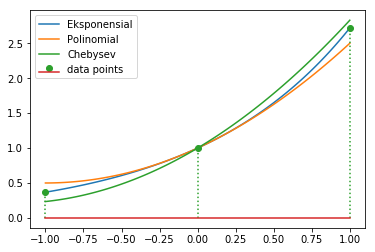

In [13]:
%matplotlib inline
from __future__ import print_function
import numpy as np, matplotlib.pyplot as plt, math

def eks(x): # Fungsi Eksponensial
    return math.exp(x)

def pol_2(x): # Fungsi Pendekatan Polinomial Derajat 2
    return 1+x+0.5*x**2

def che_2(x): # Fungsi Pendekatan Polinomial Derajat 2
    return 1+ 1.29772*x+0.532042*x**2

X = np.linspace(-1, 1, 100)
y1 = [eks(x) for x in X]
y2 = [pol_2(x) for x in X]
y3 = [che_2(x) for x in X]

x_data = [-1, 0, 1]
y_data = [math.exp(-1), 1, math.exp(1)]

plt.plot(X, y1, label = "Eksponensial")
plt.plot(X, y2, label = "Polinomial")
plt.plot(X, y3, label = "Chebysev")
plt.stem(x_data, y_data, label = "data points", linefmt='C2:', markerfmt = 'C2o')
plt.legend()
plt.show()

## Mari kita analisa error dari pendekatan 2 fungsi diatas

In [14]:
error_poly = [abs(y_eks-y_pol) for y_eks,y_pol in zip(y1,y2)]
error_che = [abs(y_eks-y_che) for y_eks,y_che in zip(y1,y3)]

print('Maksimum Error pendekatan polynomial = ', max(error_poly))
print('Maksimum Error pendekatan chebysev = ', max(error_che))

Maksimum Error pendekatan polynomial =  0.2182818284590451
Maksimum Error pendekatan chebysev =  0.15574827874092856


<h2 id="Mengingat-kembali-deret-Taylor">Mengingat kembali deret Taylor</h2>

<p><img alt="" src="images/deret_taylor_utk_bbrp_fungsi.png" style="width: 408px; height: 287px;" /></p>


<h2 id="Analisa-Teorema-Aproksimasi-Taylor-berikut">Analisa Teorema Aproksimasi Taylor berikut</h2>

<p><img alt="" src="images/Teorema_aproksimasi_Taylor.png" style="width: 600px; height: 312px;" /></p>
* Pahami teoremanya; Coba $f(x) = e^x$
* [a,b] = [-1, 1]
* N = 2, $x_0 = 0$
* Apakah $P_N(x)$ dan $E_N(x)$?

## Bagaimana cara "menggunakan" teorema diatas?

<p><img alt="" src="images/contoh_4.1_Matthews.png" style="width: 600px; height: 469px;" /></p>


In [15]:
# in Python
def Rn(x,c,N = 16):
    return (math.exp(c)*x**N)/math.factorial(N)

xo = 1
eps = 10**-6 # epsilon
C = np.linspace(0+eps, 1-eps, 100)
Y_E15 = [Rn(xo, c, N=16) for c in C]
print('Maksimum Error = ', max(Y_E15))
idx = Y_E15.index(max(Y_E15))
print('Ketika c = ', C[idx])

Maksimum Error =  1.2991953390200655e-13
Ketika c =  0.999999


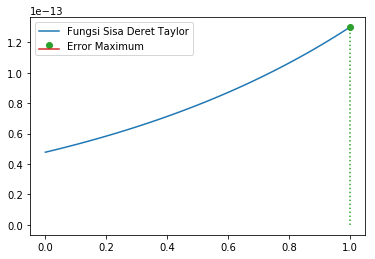

In [16]:
cMax = [C[idx]]
eMax = [max(Y_E15)]
plt.plot(C, Y_E15, label = "Fungsi Sisa Deret Taylor")
plt.stem(cMax, eMax, label = "Error Maximum", linefmt='C2:', markerfmt = 'C2o')
plt.legend()
plt.show()

<h2 id="Apa-penting/maksud-nya-Corolarry-ini?">Apa penting/maksud-nya Corolarry ini?</h2>

<p><img alt="" src="images/corolarry 4.1.png" style="width: 600px; height: 88px;" /></p>


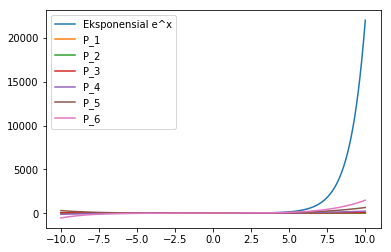

In [17]:
# Hal 197
X = np.linspace(-10, 10, 1000)
Y = [eks(x) for x in X]
plt.plot(X, Y, label = "Eksponensial e^x")

def PN(x, N=1):
    y = 0
    for i in range(N):
        y = y + x**i/math.factorial(i)
    return y

x = 1
N = [1,2,3,4,5,6]
for n in N:
    Y = [PN(x,n) for x in X]
    plt.plot(X, Y, label = "P_"+str(n))
plt.legend()
plt.show()

# Pendahuluan Interpolasi
* Di section sebelum ini kita membahas bahwa polinomial dapat digunakan untuk mendekati fungsi eksponensial.
* Bahkan dengan teorema Taylor kita bisa menghitung pendekatan untuk semarang fungsi.
* Tapi Teorema tersebut agak menyulitkan untuk diaplikasikan di dunia nyata (<b>Kenapa?</b>)
* Di bagian ini kita akan merubah permasalahannya:
* Diberikan titik-titik = $\{(x_i,y_i), i\in I\}$ dimana $y_i = f(x_i)$ untuk suatu fungsi _f(x)_
* Tentukan fungsi polinomial _P(x)_ yang melewati titk-titik tersebut

## Permasalahan diatas dapat diselesaikan dengan mengubah permasalahannya menjadi sebuah Sistem Persamaan linear (SPL)

* Untuk mengestimasi fungsi $y=f(x)$ pada titik $x$ berdasarkan nilai-nilai dari fungsinya yang diketahui $f(x_0),\cdots,f(x_n)$ pada himpunan $n+1$ titik $a=x_0\le x_1\le\cdots\le
x_n=b$ di interval interval $[a,\; b]$. 

* Proses ini disebut <b>interpolasi</b> jika $a<x<b$ atau ekstrapolasi jika  $x<a$ atau $b<x$. 

* Salah satu cara untuk menyelesaikan permasalahan ini adalah dengan mengaproksimasi $f(x)$ dengan polinomial derajat <i>n</i> : 

$$
f(x)\approx P_n(x)=a_nx^n+a_{n-1}x^{n-1}+\cdots+a_2x^2+a_1x+a_0
=\sum_{j=0}^n a_jx^j \qquad \qquad (1)
$$	

* Dimana $n+1$ coefficient $a_0,\cdots,a_n$ bisa didapatkan berdasarkan $n+1$ titik yang diberikan. Ketika $P_n(x)$ telah dihitung, maka berbagai operasi pada fungsi $f(x)$, seperti turunan, integral, dan mencari akar dapat di lakukan (secara aproksimasi) berdasarkan $P_n(x)\approx f(x)$. 

* Hal ini bermanfaat jika $f(x)$ adalah fungsi yang "sulit"

* Kita ingin menemukan koefisien-koefisien dari $P_n(x)$
* sehingga ia melewati seluruh titik $\{x_i,y_i=f(x_i),\;i=0,\cdots,n\}$, 
* dengan kata lain $n+1$ persamaan linear berikut ini harus terpenuhi: 
$$
P_n(x_i)=\sum_{j=0}^n a_jx^j_i=f(x_i)=y_i,\;\;\;\;(i=0,\cdots,n)
$$	

* Dalam bentuk matriks koefisien $a_0,\cdots,a_n$ dapat dihitung dengan menyelesaikan $n+1$ persamaan linear: 
$$
\left[ \begin{array}{ccccc}
1 & x_0 & x_0^2 & \dots & x_0^n \\
1 & x_1 & x_1^2 & \dots & x_1^n \\
1 & x_2 & x_2^2 & \dots & x_2^n \\
\vdots & \vdots & \vdots &\ddots & \vdots \\
1 & x_n & x_n^2 & \dots & x_n^n\end{array}\right]
\left[ \begin{array}{c}
a_0  \\
a_1 \\
a_2  \\
\vdots \\
a_n \end{array}\right]
= {\bf Va} 
= \left[ \begin{array}{c}
y_0  \\
y_1 \\
y_2  \\
\vdots \\
y_n \end{array}\right]
={\bf y}
$$	

dimana ${\bf a}=[a_0,\cdots,a_n]^T$, ${\bf y}=[y_0,\cdots,y_n]^T$, dan 

$$
{\bf V}=\left[ \begin{array}{ccccc}
1 & x_0 & x_0^2 & \dots & x_0^n \\
1 & x_1 & x_1^2 & \dots & x_1^n \\
1 & x_2 & x_2^2 & \dots & x_2^n \\
\vdots & \vdots & \vdots &\ddots & \vdots \\
1 & x_n & x_n^2 & \dots & x_n^n \end{array}\right]
$$

* Matriks diatas disebut sebagai matriks <b>Vandermonde</b>. 
* Solusi SPL ini akan memberikan koefisien  $[a_0,\cdots,a_n]^T={\bf a}={\bf V}^{-1}{\bf y}$. 
* Ke $n+1$ polinomial $x^0, x^1, x^2,\cdots,x^n$ dapat dianggap sebagai sebuah (salah satu contoh) himpunan polynomial basis functions yang merentang (span) ruang (space) dari semua polinomial derajat n. 
* Jika titik-titik $x_0,\cdots,x_n$ berbeda, atau dengan kata lain, ${\bf V}$ memiliki rank yang penuh dan invers dari ${\bf V}^{-1}$ ada, maka solusi ${\bf a}={\bf V}^{-1}{\bf f}$ unik, begitu juga $P_n(x)$.

* Error kemudian dapat dihitung dengan cara (MSE):
$$
\left(\frac{1}{k}\sum_{i=1}^k [f(u_i)-P_3(u_i)]^2 \right)^{1/2}
$$

### Contoh:

Aproksimasi fungsi $y=f(x)=x \sin(2x+\pi/4)+1$ dengan polinomial  $P_3(x)$ dengan derajat $n=3$, berdasarkan titik-titik berikut $n+1=4$:

$$
\begin{array}{|c|c|c|c|c|}
\hline
i & 0 & 1 & 2 & 3 \\
\hline 
x_i & -1 & 0 & 1 & 2 \\
\hline
y_i=f(x_i) & 1.937 & 1.000 & 1.349 & -0.995 
\end{array}
$$

Pertama-tama kita tentukan matriks Vandermonde-nya: 

$$ {\bf V} =
\left[ \begin{array}{ccccc}
1 & x_0 & x_0^2 &  x_0^3 \\
1 & x_1 & x_1^2 &  x_1^3 \\
1 & x_2 & x_2^2 &  x_2^3 \\
1 & x_n & x_n^2 & x_n^3\end{array}\right] = 
\left[ \begin{array}{ccccc}
1 & -1 & 1 &  -1 \\
1 & 0 & 0 &  0 \\
1 & 1 & 1 &  1 \\
1 & 2 & 4 & 8\end{array}\right] 
\left[ \begin{array}{c}
a_0 \\
a_1\\
a_2\\
a_3\end{array}\right]= 
\left[ \begin{array}{c}
1.937 \\
1.000\\
1.349\\
-0.995\end{array}\right]
$$

* Kita kemudian bisa menggunakan metode Gauss atau Gauss-Newton di Aljabar Linear untuk menemukan solusi dari SPL ini.

In [18]:
# Contoh 
x_data = np.array([-1, 0, 1, 2])
y_data = np.array([1.937, 1, 1.349, -0.995])
V = np.vander(x_data, 4, increasing=False) # Fungsi Vandermonde di Numpy
print(V)

[[-1  1 -1  1]
 [ 0  0  0  1]
 [ 1  1  1  1]
 [ 8  4  2  1]]


In [19]:
a = np.linalg.solve(V, y_data) # Selesaikan SPL-nya
print(a)

[-0.66316667  0.643       0.36916667  1.        ]


In [20]:
# Look at the polynomial
p = np.poly1d(a)
print(np.poly1d(p))

         3         2
-0.6632 x + 0.643 x + 0.3692 x + 1


In [21]:
def f(x):
    return x*np.sin(2*x+np.pi/4)+1

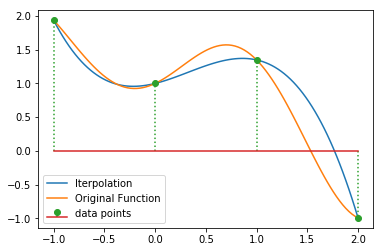

In [22]:
x = np.linspace(-1, 2, 100)
y_int = p(x)
y_org = f(x)

plt.plot(x, y_int, label = "Iterpolation")
plt.plot(x, y_org, label = "Original Function")
plt.stem(x_data, y_data, label = "data points", linefmt='C2:', markerfmt = 'C2o')
plt.legend()
plt.show()

In [12]:
np.polynomial.polynomial.polyvander(x_data, 3)

array([[ 1., -1.,  1., -1.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.]])

## Aplikasi Interpolasi

 - Data filling
 - Function approximation
 - Fundamental component of other algorithms
   - Root finding (secant method)
   - Optimization, minima/maxima (successive parabolic interpolation)
   - Numerical integration and differentiation

## Interpolasi Lagrange (hal 215)

Diberikan $N+1$ titik-titik $(x_0,y_0), (x_1,y_1), \ldots, (x_{N},y_{N})$ dan memisalkan $x_i$ semuanya unik, interpolasi polinomialnya $\mathcal{P}_N(x)$ dapat ditulis sebagai:

$$\mathcal{P}_N(x) = \sum^{N}_{i=0} y_i \ell_i(x)$$

dimana 

$$\ell_i(x) = \prod^{N}_{j=0, j \neq i} \frac{x - x_j}{x_i - x_j} = \frac{x - x_0}{x_i - x_0} \frac{x - x_1}{x_i - x_1} \cdots \frac{x - x_{i-1}}{x_i - x_{i-1}}\frac{x - x_{i+1}}{x_i - x_{i+1}} \cdots \frac{x - x_{N}}{x_i - x_{N}}$$

dengan $\ell_i(x_i) = 1$ dan $\forall j\neq i, ~~ \ell_i(x_j) = 0$.

#### Contoh (di buku):  $N = 1$ Lagrange Polynomial

Diberikan 2 titik $(x_0, y_0)$ dan $(x_1, y_1)$ bentuk Lagrange dari $\mathcal{P}_N(x)$ adalah

$$\ell_0(x) = \frac{x - x_1}{x_0 - x_1}$$

dan

$$\ell_1(x) = \frac{x - x_0}{x_1 - x_0}$$

sehingga

$$\mathcal{P}_1(x) = \ell_0(x) \cdot y_0 + \ell_1(x) \cdot y_1 = \frac{x - x_1}{x_0 - x_1} \cdot y_0 + \frac{x - x_0}{x_1 - x_0} \cdot y_1$$

Salah satu hal yang penting dari polinomial Lagrange adalah $\ell_i(x)=1$ ketika $x  = x_i$ dan untuk $\ell_j(x)=0$ untuk $j \neq i$.

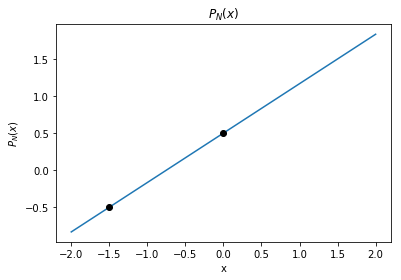

In [23]:
# Di Python
data = np.array([[-1.5, -0.5], [0.0, 0.5]])
N = data.shape[0] - 1
M = data.shape[0]
x = np.linspace(-2.0, 2.0, 100)

# Hitung Basis Lagrange (\ell_i(x))
def lagrange_basis(x, data):
    basis = np.ones((data.shape[0], x.shape[0]))
    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            if i != j:
                basis[i, :] *= (x - data[j, 0]) / (data[i, 0] - data[j, 0])
    return basis

# Hitung interpolasi polynomial interpolant dari (x,y) menggunakan basis Lagrange
def poly_interpolant(x, data):
    P = np.zeros(x.shape[0])
    basis = lagrange_basis(x, data)
    for n in range(data.shape[0]):
        P += basis[n, :] * data[n, 1]
    return P

# Plot full polynomial P_N(x)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, poly_interpolant(x, data), label="$P_{%s}(x)$" % N)
for point in data:
    axes.plot(point[0], point[1], 'ko')
axes.set_title("$P_N(x)$")
axes.set_xlabel("x")
axes.set_ylabel("$P_N(x)$")
plt.show()

## Contoh di Buku Hal 216

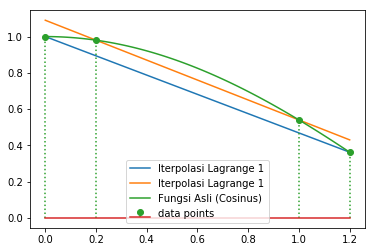

In [24]:
data_1 = np.array([[0.0, math.cos(0.0)], [1.2, math.cos(1.2)]])
data_2 = np.array([[0.2, math.cos(0.2)], [1.0, math.cos(1.0)]])
X = np.linspace(0.0, 1.2, 100)

plt.plot(X, poly_interpolant(X, data_1), label = "Iterpolasi Lagrange 1")
plt.plot(X, poly_interpolant(X, data_2), label = "Iterpolasi Lagrange 1")
plt.plot(X, [math.cos(x) for x in X], label = "Fungsi Asli (Cosinus)")
x_data = np.append(data_1[:,0],data_2[:,0])
y_data = np.append(data_1[:,1],data_2[:,1])
plt.stem(x_data, y_data, label = "data points", linefmt='C2:', markerfmt = 'C2o')
plt.legend()
plt.show()

#### Contoh Lain:  Interpolasi 6 titik dari $sin(\pi x)$

* Gunakan 6 titik untuk approksimasi $\sin$ pada interval $x \in [-1, 1]$.  
* Apa yang terjadi jika $N \rightarrow \infty$?  
* Plot error antara $f(x)$ dan $P_N(x)$.

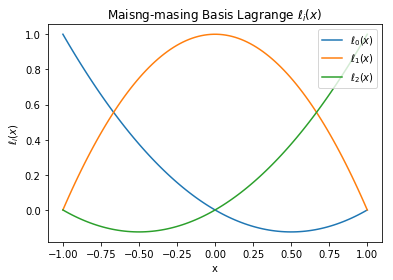

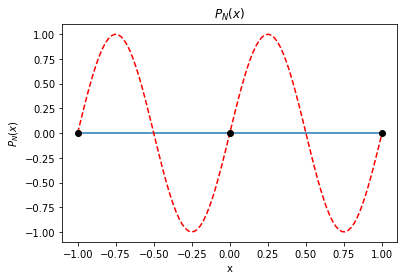

In [26]:
num_points = 3
data = np.empty((num_points, 2))
data[:, 0] = np.linspace(-1, 1, num_points)
data[:, 1] = np.sin(2.0 * np.pi * data[:, 0])
N = data.shape[0] - 1 # Degree of polynomial
M = data.shape[0]
x = np.linspace(-1.0, 1.0, 100)

# Plot individual basis functions
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
basis = lagrange_basis(x, data)
for i in range(N + 1):
    axes.plot(x, basis[i, :], label="$\ell_{%s}(x)$" % i)

axes.set_title("Maisng-masing Basis Lagrange $\ell_i(x)$")
axes.set_xlabel("x")
axes.set_ylabel("$\ell_i(x)$")
axes.legend(loc=1)

# Plot polynomial P_N(x)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, poly_interpolant(x, data), label="$P_{%s}(x)$" % N)
axes.plot(x, np.sin(2.0 * np.pi * x), 'r--', label="True $f(x)$")
for point in data:
    axes.plot(point[0], point[1], 'ko')
axes.set_title("$P_N(x)$")
axes.set_xlabel("x")
axes.set_ylabel("$P_N(x)$")
    
plt.show()

#### Fungsi Runge's 
* Interpolasi $f(x) = \frac{1}{1 + 25 x^2}$ menggunakan sembarang 6 titik di $x \in [-1, 1]$.
* Coba N=11.
* Apa yang terjadi ketika N membesar?

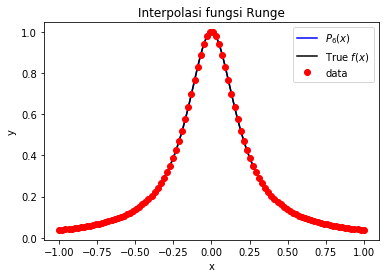

In [35]:
def f(x):
    return 1.0 / (1.0 + 25.0 * x**2)

x = np.linspace(-1, 1, 100)
num_points = 100
data = np.empty((num_points, 2))
data[:, 0] = np.linspace(-1, 1, num_points)
data[:, 1] = f(data[:, 0])
N = data.shape[0] - 1
    
# Plot the results
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, poly_interpolant(x, data), 'b', label="$P_6(x)$")
axes.plot(x, f(x), 'k', label="True $f(x)$")
axes.plot(data[:, 0], data[:, 1], 'ro', label="data")
          
axes.set_title("Interpolasi fungsi Runge")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.legend(loc=1)

plt.show()

## Hikmah:
* Hindari menginterpolasi dengan derajat yang terlalu tinggi. Mulai dari derajat rendah, lalu tambahkan perlahan.
* Hindari extrapolasi - Selalu verifikasi jika x diluar batas domain data

### Analisa Error

**Theorem:** Lagrange Remainder Theorem - Misal $f(x) \in C^{N+1}[-1, 1]$, maka
$$
    f(x) = \mathcal{P}_N(x) + R_N(x)
$$
dimana $\mathcal{P}_N(x)$ adalah interpolasi polinomialnya dan
$$
    R_N(x) = Q(x) \frac{f^{(N+1)}(c)}{(N+1)!} \quad \text{with} \quad c \in [-1,1]
$$
dengan
$$
    Q(x) = \prod^N_{i=0} (x - x_i) = (x-x_0)(x-x_1)\cdots(x-x_N) .
$$
* Meminimumkan error pendekatan Lagrange berarti meminimumkan fungsi Q(x)
* Bagaimana memilih titik-titiknya agar Q(x) minimal?

<h2 id="Teorema-di-Buku">Teorema di Buku</h2>

<p><img alt="" src="images/lagrange_bounds_theorem.png" style="width: 600px; height: 339px;" /></p>


<p><img alt="" src="images/contoh_error_bound_Lagrange.png" style="width: 600px; height: 414px;" /></p>


<h1 id="Polynomial-Newton">Polynomial Newton</h1>

<p><img alt="" src="images/Polynomial_Newton.png" style="width: 600px; height: 217px;" /></p>
* Apa nilai ao, a1, a2, ... ?

<h2 id="Diagonal-dari-tabel-ini:">Diagonal dari tabel ini:</h2>

<p><img alt="" src="images/tabel-diff_Newton.png" style="width: 600px; height: 143px;" /></p>

<p><img alt="" src="images/recursive_Newton.png" style="width: 600px; height: 218px;" /></p>


<h2 id="Contoh">Contoh</h2>

<p><img alt="" src="images/contoh_poly_newton.png" style="width: 600px; height: 208px;" /></p>

<p><img alt="" src="images/contoh_poly_newton_table.png" style="width: 600px; height: 229px;" /></p>


<h2 id="Errornya">Errornya</h2>

<p><img alt="" src="images/error_Polynomial_Newton.png" style="width: 600px; height: 209px;" /></p>


In [5]:
import math

def f(x):
    return 3*math.sin(2*x)

f(1)

2.727892280477045

<h1>End of Module</h1>

<hr />